<h2><left>Hello, This Notebook Contains example for User-User Collaborative Filtering Algorithm </left></h2>
<h4><left>- Collaborative filtering is kind of recommendation systems, used in different websites to make relations between users and items in site.</left></h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
        <ul>
            <li><h4>Contents:</h4></li>
    <ul>
        <li><a href="#ref1">Data Preparation</a></li>
        <li><a href="#ref2">Basic Statistics</a></li>
        <li><a href="#ref3">Implementation</a></li>
        <ul>
            <li><a href="#ref4">BaseLine</a></li>
            <li><a href="#ref5">User-User Collaborative</a></li>
            <li><a href="#ref6">Results</a></li>
        </ul>
    </ul>
    </ul>
</div>
<hr>


<a id="ref1"></a>
<h3><center>Data Preparation</center></h3>

----------

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = '../Data/user_item_rating.csv'

In [3]:
data = pd.read_csv(DATA_PATH)
data_ = data[:1000]
data

,rating,user_id,book_id
0,5,8842281e1d1347389f2ab93d60773d4d,18245960
1,3,8842281e1d1347389f2ab93d60773d4d,16981
2,3,8842281e1d1347389f2ab93d60773d4d,28684704
3,0,8842281e1d1347389f2ab93d60773d4d,27161156
4,4,8842281e1d1347389f2ab93d60773d4d,25884323
...,...,...,...
1378028,0,35cef391b171b4fca45771e508028212,15745950
1378029,0,35cef391b171b4fca45771e508028212,10861195
1378030,4,35cef391b171b4fca45771e508028212,6131164
1378031,4,35cef391b171b4fca45771e508028212,10025305


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378033 entries, 0 to 1378032
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   rating   1378033 non-null  int64 
 1   user_id  1378033 non-null  object
 2   book_id  1378033 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


In [5]:
def normalize_user_id(data):
    user_id = {}
    ids = data.user_id.unique()
    for index,id_ in enumerate(ids):
        user_id[id_]= index
    return user_id  

def get_normalized_user_id(item,user_id_dict):
    return user_id_dict[item]

In [6]:
user_id_dict = normalize_user_id(data)
data['user_id'] = data.user_id.apply(get_normalized_user_id,user_id_dict= user_id_dict)
data

,rating,user_id,book_id
0,5,0,18245960
1,3,0,16981
2,3,0,28684704
3,0,0,27161156
4,4,0,25884323
...,...,...,...
1378028,0,18891,15745950
1378029,0,18891,10861195
1378030,4,18891,6131164
1378031,4,18891,10025305


<a id="ref2"></a>
<h3><center>Basic Statistics</center></h3>

-------------------

In [7]:
print("Mean rating : {}".format(data['rating'].mean()))
print("Mean rating standard deviation: {}".format(data['rating'].std()))

Mean rating : 3.6850786592193367
Mean rating standard deviation: 1.252454993929364


Text(0, 0.5, 'count')

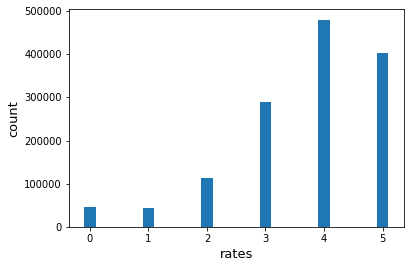

In [8]:
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(data['rating'], bins=[-0.1,0.1,0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1])
ax.set_xlabel('rates', fontsize=13)
ax.set_ylabel('count', fontsize=13)
#ax.title('Distribution of reviews', fontsize=15)

In [9]:
num_users = len(data['user_id'].unique())
num_items = len(data['book_id'].unique())

print("Number of users: {}".format(num_users))
print("Number of books : {}".format(num_items))
print("Number of ratings  : {}".format(len(data)))

Number of users: 18892
Number of books : 25475
Number of ratings  : 1378033


Text(0, 0.5, 'number of users')

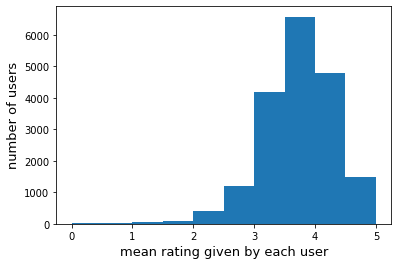

In [10]:
mean_rating_of_user = data.groupby('user_id').apply(lambda x: x['rating'].mean())

fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each user', fontsize=13)
ax.set_ylabel('number of users', fontsize=13)

In [11]:
avg_num_rates = data.groupby('user_id')['book_id'].count()
print("Avg Number of ratings per user {}".format(avg_num_rates.mean()))

Avg Number of ratings per user 72.94267414778743


In [12]:
# turn each reviewer and product into categorical data,
data['user_id'] = data['user_id'].astype("category")
data['book_id']       = data['book_id'].astype("category")

In [13]:
rates = csc_matrix((data['rating'].astype(float), 
                     (data['user_id'].cat.codes,
                      data['book_id'].cat.codes)))
rates.shape

(18892, 25475)

In [14]:
ratings_matrix = rates.toarray()

In [15]:
sparsity = float(len(ratings_matrix.nonzero()[0]))
sparsity /= (ratings_matrix.shape[0] * ratings_matrix.shape[1])
sparsity *= 100
print("Sparsity: {:4.2f}%".format(sparsity))

Sparsity: 0.28%


In [16]:
mean_rating = data['rating'].mean()
mean_rating

3.6850786592193367

<a id="ref3"></a>
<h3><center>Implementation</center></h3>

___________________

<a id="ref4"></a>
<h4><left>BaseLine:</left></h4>

In [17]:
base_rmse = np.sqrt(pow(data['rating']-mean_rating, 2).mean())
print("RMSE = {}".format(base_rmse))

RMSE = 1.252454539493505


<a id="ref5"></a>
<h4><left>User-User Collaborative:</left></h4>

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def User_User_CF(rates):  
    # Get the user-user similarity matrix
    user_user_similarity = cosine_similarity(rates)
    
    sqdiffs = 0
    num_preds = 0

    # to protect against divide by zero issues
    eps = 1e-6

    cnt_no_sims = 0
    # loop over the users
    for user_i, u in enumerate(rates):
        
        # products user HAS rated
        i_rated = np.where(u>0)[0]
    
        # Get the average rating for this user
        user_avg =  i_rated.mean()
        
        # loop over all the products that each user reviewed
        # Note: these are all the non-zero entries in the row
        for i_product in i_rated:
        
            # Get all the users (indices) that
            # have also reviewed this product.
            # Note: This also includes the user of interest!
            i_has_rated = np.where(rates[:, i_product])[0]
        
            # remove the user (indices) of interest 
            # from this column
            i_remove = np.argmin(abs(i_has_rated - user_i))
            i_others_have_rated = np.delete(i_has_rated, i_remove)
        
            # Get the ratings for product by the similar users,
            ratings = rates[i_others_have_rated, 
                              i_product]
                    
            ratings -= user_avg
               
            # get the cosine similarity between the users
            # and other users.
            similarities = user_user_similarity[user_i,
                                                i_others_have_rated]
            
            # denominator of user_i's produdct prediction
            norm = np.sum(similarities)
            if norm==0:
                cnt_no_sims += 1
                norm = eps
            
            # prediction of user u on product i: p_{u,i}
            predicted_rating = user_avg + np.sum(np.multiply(
                                            ratings.T,
                                            similarities))/norm
            
            # actual rating by user u on product i
            actual_rating = rates[user_i, i_product]
            
        # get the L2 difference in predicted and actual
        # rating for the user
        sqdiffs += pow(predicted_rating - actual_rating, 2.0)
        num_preds+=1
    
    # get the average of all the predictions
    rmse_cossim = np.sqrt(sqdiffs/num_preds)
    return rmse_cossim

<a id="ref6"></a>
<h3><left>Results:</left></h3>

In [19]:
user_all_rmse = User_User_CF(ratings_matrix)
print(user_all_rmse)

E:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
E:\Applications\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0441692856062417


<h3><center>..The End..</center></h3>